This code is used to compare normal code i use by practice and a code generating from Alphacodium using flow. The output is the same from both trading stategy and backtest

In [6]:
def loaddataYFinance(symbol, from_date, to_date, interval):

    import pandas as pd
    import yfinance as yf

    data = yf.download(symbol, start=from_date, end=to_date, interval=interval)
    data.reset_index(inplace=True)
    data = data.rename(columns={'Date': 'Datetime'})  
        # data = data.drop('Adj Close', axis=1)
    data = pd.DataFrame(data, columns=['Datetime', 'Open', 'High', 'Low', 'Close', 'Volume'])

    return data

In [7]:
symbol = 'VCB.VN'
from_date = '2020-10-01'
to_date = '2020-12-30'
interval = '1d'
data = loaddataYFinance(symbol, from_date, to_date, interval)

[*********************100%%**********************]  1 of 1 completed


In [8]:
data

,Datetime,Open,High,Low,Close,Volume
0,2020-10-01,56471.457031,56471.457031,55874.226562,56272.378906,553097
1,2020-10-02,56272.378906,56405.097656,53087.152344,55741.507812,1342455
2,2020-10-05,56073.304688,56405.097656,55343.355469,55409.714844,1318201
3,2020-10-06,55608.789062,56006.945312,55210.636719,55675.148438,5460016
4,2020-10-07,55476.074219,56537.816406,55144.277344,56405.097656,1489278
...,...,...,...,...,...,...
59,2020-12-23,64699.964844,65363.554688,64301.812500,64699.964844,1004219
60,2020-12-24,64965.402344,64965.402344,63704.582031,64567.246094,1464353
61,2020-12-25,64368.171875,64766.324219,64169.093750,64766.324219,578609
62,2020-12-28,65031.757812,65164.476562,64567.246094,65031.757812,1259949


Normal Trading Strategy

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Giả sử DataFrame 'data' đã được tạo và chứa cột 'Datetime' và 'Close'
# Thiết lập 'Datetime' làm chỉ mục của DataFrame
data.set_index('Datetime', inplace=True)

# Thiết lập cửa sổ thời gian cho SMA và độ lệch chuẩn
window = 20

# Tính toán SMA cho giá đóng cửa
data['SMA'] = data['Close'].rolling(window=window).mean()

# Tính toán MACD
# EMA ngắn hạn
data['short_ema'] = data['Close'].ewm(span=12, adjust=False).mean()
# EMA dài hạn
data['long_ema']  = data['Close'].ewm(span=26, adjust=False).mean()
# Tính MACD
data['MACD'] = data['short_ema']  - data['long_ema']
# Tính Signal Line
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

# Tạo cột tín hiệu mua/bán
data['Buy_Signal'] = (data['MACD'] > data['Signal_Line']) & (data['Close'] > data['SMA'])
data['Sell_Signal'] = (data['MACD'] < data['Signal_Line']) & (data['Close'] < data['SMA'])

# In ra các ngày có tín hiệu mua/ bán
buysell_signals = data[(data['Buy_Signal'] == True) | (data['Sell_Signal'] == True)]
print(buysell_signals[['Close', 'SMA', 'MACD', 'Signal_Line', 'Buy_Signal', 'Sell_Signal']])

# In ra các ngày có tín hiệu mua/ bán
buysell_signals = data[(data['Buy_Signal'] == True) | (data['Sell_Signal'] == True)]
print(buysell_signals[['Close', 'SMA', 'MACD', 'Signal_Line', 'Buy_Signal', 'Sell_Signal']])

data.to_csv('Buoi 11.2 Duong MACD va MA.csv')


                   Close           SMA         MACD  Signal_Line  Buy_Signal  \
Datetime                                                                       
2020-10-28  55874.226562  57065.368750   174.923758   335.545735       False   
2020-10-29  55476.074219  57025.553516    25.320898   273.500768       False   
2020-10-30  55077.917969  56992.374023  -123.939628   194.012689       False   
2020-11-02  56935.968750  57068.686719   -91.248644   136.960422       False   
2020-11-03  56405.097656  57105.184180  -106.944870    88.179364       False   
2020-11-04  56405.097656  57105.184180  -118.023738    46.938743       False   
2020-11-05  56405.097656  57111.820117  -125.358763    12.479242       False   
2020-11-06  56405.097656  57118.456055  -129.676987   -15.952004       False   
2020-11-09  56736.890625  57105.184180  -105.114596   -33.784522       False   
2020-11-10  56471.457031  57058.733008  -105.846860   -48.196990       False   
2020-11-11  56338.738281  56949.240820  

Alphacodium Generating Code

In [10]:
symbol = 'VCB.VN'
from_date = '2020-10-01'
to_date = '2020-12-30'
interval = '1d'
data = loaddataYFinance(symbol, from_date, to_date, interval)

[*********************100%%**********************]  1 of 1 completed


In [11]:

import pandas as pd
import numpy as np


def handle_missing_values(data):
    data = data.dropna()
    return data

def check_data_sufficiency(data, window_size):
    if len(data) < window_size:
        return pd.DataFrame()
    return data

def calculate_sma(data, window_size):
    data['SMA'] = data['Close'].rolling(window_size).mean()
    return data

def calculate_ema(data, short_span, long_span):
    data['Short_EMA'] = data['Close'].ewm(span=short_span, adjust=False).mean()
    data['Long_EMA'] = data['Close'].ewm(span=long_span, adjust=False).mean()
    return data

def calculate_macd_and_signal_line(data, signal_span):
    data['MACD'] = data['Short_EMA'] - data['Long_EMA']
    data['Signal_Line'] = data['MACD'].ewm(span=signal_span, adjust=False).mean()
    return data

def generate_signals(data):
    data['Buy_Signal'] = np.where((data['MACD'] > data['Signal_Line']) & (data['Close'] > data['SMA']), True, False)
    data['Sell_Signal'] = np.where((data['MACD'] < data['Signal_Line']) & (data['Close'] < data['SMA']), True, False)
    return data

def format_output(data):
    output = data[['Close', 'SMA', 'MACD', 'Signal_Line', 'Buy_Signal', 'Sell_Signal']]
    return output


In [12]:

if __name__ == "__main__":
    data = handle_missing_values(data)
    data = check_data_sufficiency(data, 20)
    if not data.empty:
        data = calculate_sma(data, 20)
        data = calculate_ema(data, 12, 26)
        data = calculate_macd_and_signal_line(data, 9)
        data = generate_signals(data)
        output = format_output(data)
        print(output)

           Close           SMA         MACD  Signal_Line  Buy_Signal  \
0   56272.378906           NaN     0.000000     0.000000       False   
1   55741.507812           NaN   -42.348691    -8.469738       False   
2   55409.714844           NaN  -101.513074   -27.078405       False   
3   55675.148438           NaN  -125.535902   -46.769905       False   
4   56405.097656           NaN   -84.697029   -54.355330       False   
..           ...           ...          ...          ...         ...   
59  64699.964844  63555.273047  1557.612944  1622.307010       False   
60  64567.246094  63664.765234  1452.019176  1588.249443       False   
61  64766.324219  63767.621680  1368.622664  1544.324087       False   
62  65031.757812  63933.518945  1308.860868  1497.231443       False   
63  65828.070312  64172.411328  1310.646658  1459.914486       False   

    Sell_Signal  
0         False  
1         False  
2         False  
3         False  
4         False  
..          ...  
59       

In [13]:
data

,Datetime,Open,High,Low,Close,Volume,SMA,Short_EMA,Long_EMA,MACD,Signal_Line,Buy_Signal,Sell_Signal
0,2020-10-01,56471.457031,56471.457031,55874.226562,56272.378906,553097,NaN,56272.378906,56272.378906,0.000000,0.000000,False,False
1,2020-10-02,56272.378906,56405.097656,53087.152344,55741.507812,1342455,NaN,56190.706430,56233.055122,-42.348691,-8.469738,False,False
2,2020-10-05,56073.304688,56405.097656,55343.355469,55409.714844,1318201,NaN,56070.553879,56172.066953,-101.513074,-27.078405,False,False
3,2020-10-06,55608.789062,56006.945312,55210.636719,55675.148438,5460016,NaN,56009.722272,56135.258174,-125.535902,-46.769905,False,False
4,2020-10-07,55476.074219,56537.816406,55144.277344,56405.097656,1489278,NaN,56070.549254,56155.246284,-84.697029,-54.355330,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2020-12-23,64699.964844,65363.554688,64301.812500,64699.964844,1004219,63555.273047,64444.584525,62886.971582,1557.612944,1622.307010,False,False
60,2020-12-24,64965.402344,64965.402344,63704.582031,64567.246094,1464353,63664.765234,64463.455536,63011.436360,1452.019176,1588.249443,False,False
61,2020-12-25,64368.171875,64766.324219,64169.093750,64766.324219,578609,63767.621680,64510.050718,63141.428054,1368.622664,1544.324087,False,False
62,2020-12-28,65031.757812,65164.476562,64567.246094,65031.757812,1259949,63933.518945,64590.313348,63281.452480,1308.860868,1497.231443,False,False


BACKTEST

In [14]:
def backtest(data, initial_capital, shares_per_signal): # Chung khoan
    import pandas as pd
    import matplotlib.pyplot as plt
    import plotly.graph_objects as go
    import plotly.express as px

    capital = initial_capital
    shares_held = 0

        # Xác định vị thế mua/ bán
    data['Position_Buy'] = data['Buy_Signal'].shift()
    data['Position_Sell'] = data['Sell_Signal'].shift()

    data['Trade_Action'] = ''
    data['Capital'] = capital
    data['Shares_Held'] = shares_held

        # Lặp qua mỗi hàng trong DataFrame
    for index, row in data.iterrows():
            # Nếu có tín hiệu mua và có đủ vốn để mua
        if row['Position_Buy'] == 1 and capital >= row['Close'] * shares_per_signal and row['Trade_Action'] == '':
                # Mua cổ phiếu và cập nhật vốn và số cổ phiếu được giữ
            data.at[index, 'Trade_Action'] = 'Buy'
            capital -= row['Close'] * shares_per_signal
            data.at[index, 'Capital'] = capital
            shares_held += shares_per_signal
            data.at[index, 'Shares_Held'] = shares_held
        elif row['Position_Sell'] == 1 and shares_held > 0 and row['Trade_Action'] == '':
            data.at[index, 'Trade_Action'] = 'Sell'
            capital += row['Close'] * shares_held
            data.at[index, 'Capital'] = capital
            shares_held = 0
            data.at[index, 'Shares_Held'] = shares_held  # Giảm số lượng cổ phiếu 0
        else:
            data.at[index, 'Capital'] = capital
            data.at[index, 'Shares_Held'] = shares_held

            # Cập nhật giá trị hiện tại của vốn dựa trên số cổ phiếu đang giữ và giá đóng cửa hiện tại
        current_value = capital + shares_held * row['Close']

        # Ngày vào lệnh
    first_entry_date = data[data['Position_Buy'] == 1].index.min()
        # Tính lợi nhuận
    profit = current_value - initial_capital
        # Tính lợi nhuận thị trường
    market_return = (data['Close'].iloc[-1] - data['Close'].iloc[0]) / data['Close'].iloc[0]
        # Tính lợi nhuận chiến lược
    strategy_return = (current_value - initial_capital) / initial_capital

    print(f"Ngày vào lệnh đầu tiên: {first_entry_date}")
    print(f'Tổng lợi nhuận: {profit}')
    print(f'Tổng giá trị tài khoản: {current_value}')
    print(f'Lợi nhuận thị trường: {market_return * 100}%')
    print(f'Lợi nhuận chiến lược: {strategy_return * 100}%')

        # Tính toán lợi nhuận thị trường và chiến lược
    data['Market_Return'] = data['Close'].pct_change()
    data['Cumulative_Market_Returns'] = (1 + data['Market_Return']).cumprod()

        # Tính toán lợi nhuận lũy kế từ chiến lược
    data['Strategy_Value'] = data['Capital'] + data['Shares_Held'] * data['Close']
    data['Cumulative_Strategy_Returns'] = data['Strategy_Value'] / initial_capital


        # Vẽ biểu đồ so sánh lợi nhuận lũy kế từ thị trường và từ chiến lược
    plt.figure(figsize=(12, 6))
    plt.plot(data['Cumulative_Market_Returns'], label='Market Returns')
    plt.plot(data['Cumulative_Strategy_Returns'], label='Strategy Returns')
    plt.title('Comparison of Cumulative Returns: Market vs Strategy')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.show()

        # Tạo biểu đồ sử dụng Plotly
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data.index, y=data['Cumulative_Market_Returns'], mode='lines', name='Market Returns'))
    fig.add_trace(go.Scatter(x=data.index, y=data['Cumulative_Strategy_Returns'], mode='lines', name='Strategy Returns'))

    fig.update_layout(
        title='Comparison of Cumulative Returns: Market vs Strategy',
        xaxis_title='Date',
        yaxis_title='Cumulative Returns',
    )
    fig.show()
    return data

C:\Users\ASUS VN\AppData\Local\Temp\ipykernel_25168\2407345360.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '94233408.203125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.at[index, 'Capital'] = capital


Ngày vào lệnh đầu tiên: 31
Tổng lợi nhuận: 8460770.703125
Tổng giá trị tài khoản: 108460770.703125
Lợi nhuận thị trường: 16.981139933980433%
Lợi nhuận chiến lược: 8.460770703125%


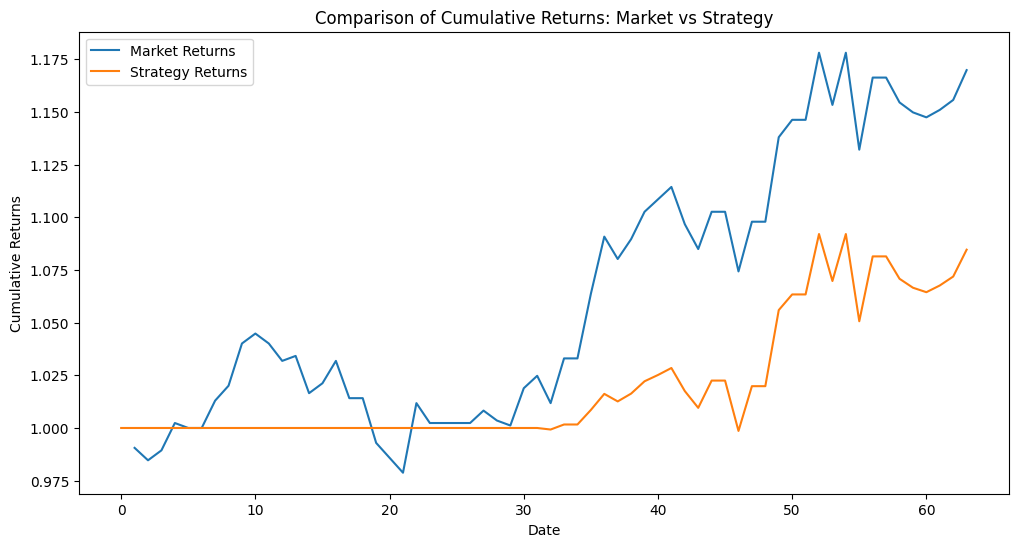

In [15]:
# initial_capital, shares_per_signal

backtest = backtest(data, 100000000, 100)
backtest.to_csv('data_out_backtest.csv')

Alphacodium Backtest

In [16]:
#backtest
import pandas as pd
import numpy as np

def initialize_variables(initial_capital):
    capital = initial_capital
    shares_held = 0
    return capital, shares_held

def add_new_columns(data, initial_capital, shares_held):
    if 'Buy_Signal' not in data.columns or 'Sell_Signal' not in data.columns:
        raise ValueError("Input data must contain 'Buy_Signal' and 'Sell_Signal' columns.")
    data['Position_Buy'] = data['Buy_Signal'].shift()
    data['Position_Sell'] = data['Sell_Signal'].shift()
    data['Trade_Action'] = ''
    data['Capital'] = initial_capital
    data['Shares_Held'] = shares_held
    return data

def iterate_rows(data, capital, shares_held, shares_per_signal):
    for i in data.index:
        if data.loc[i, 'Position_Buy'] == 1 and capital >= data.loc[i, 'Close'] * shares_per_signal and data.loc[i, 'Trade_Action'] == '':
            data.loc[i, 'Trade_Action'] = 'Buy'
            capital -= data.loc[i, 'Close'] * shares_per_signal
            shares_held += shares_per_signal
        elif data.loc[i, 'Position_Sell'] == 1 and shares_held > 0 and data.loc[i, 'Trade_Action'] == '':
            data.loc[i, 'Trade_Action'] = 'Sell'
            capital += data.loc[i, 'Close'] * shares_held
            shares_held = 0
        data.loc[i, 'Capital'] = capital
        data.loc[i, 'Shares_Held'] = shares_held
    return data, capital, shares_held

def calculate_current_value(data):
    data['Current_Value'] = data['Capital'] + data['Shares_Held'] * data['Close']
    return data

def calculate_returns(data, initial_capital):
    if initial_capital == 0:
        raise ValueError("Initial capital cannot be zero.")
    data['Market_Return'] = data['Close'].pct_change()
    data['Cumulative_Market_Returns'] = (1 + data['Market_Return']).cumprod() - 1
    data['Strategy_Value'] = data['Capital'] + data['Shares_Held'] * data['Close']
    data['Cumulative_Strategy_Returns'] = data['Strategy_Value'] / initial_capital - 1
    return data

def print_summary_statistics(data, initial_capital):
    try:
        first_entry_date = data[data['Trade_Action'] == 'Buy'].index.min()
        profit = data['Current_Value'].iloc[-1] - initial_capital
        total_account_value = data['Current_Value'].iloc[-1]
        market_return = data['Market_Return'].sum() * 100
        strategy_return = profit / initial_capital * 100
        print('first_entry_date:',first_entry_date)
        print('profit:',profit)
        print(total_account_value)
        print(f'{market_return}%')
        print(f'{strategy_return}%')
    except Exception as e:
        print("Cannot calculate summary statistics due to missing or invalid data.")

def backtest(data, initial_capital, shares_per_signal):
    if data.empty or 'Close' not in data.columns:
        raise ValueError("Input data must not be empty and must contain a 'Close' column.")
    data = data.dropna(subset=['Close'])
    capital, shares_held = initialize_variables(initial_capital)
    data = add_new_columns(data, capital, shares_held)
    data, capital, shares_held = iterate_rows(data, capital, shares_held, shares_per_signal)
    data = calculate_current_value(data)
    data = calculate_returns(data, initial_capital)
    print_summary_statistics(data, initial_capital)
    return data


In [17]:

if __name__ == "__main__":
    data = data.copy()
    initial_capital = float(100000000)
    shares_per_signal = int(100)
    backtest(data, initial_capital, shares_per_signal)

first_entry_date: 31
profit: 8460770.703125
108460770.703125
16.380423949839184%
8.460770703125%
